In [2]:
pip install pyrosm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.8/225.8 kB 8.0 MB/s eta 0:00:00
  Obtaining dependency information for geopandas>=0.8.0 from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00:00:0100:01
  Using cached cykhash-2.0.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached pyrobuf-0.9.3-cp38-cp38-macosx_10_9_x86_64.whl
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/44/80/64200180c8dacdeadc8192aa6349b3fe2d4051591427149cea97c0a5e744/Fiona-1.9.4.post1-cp38-cp38-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [3]:
import lib
import numpy as np
import matplotlib.pyplot as plt
from pyrosm import OSM

/Users/kod/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


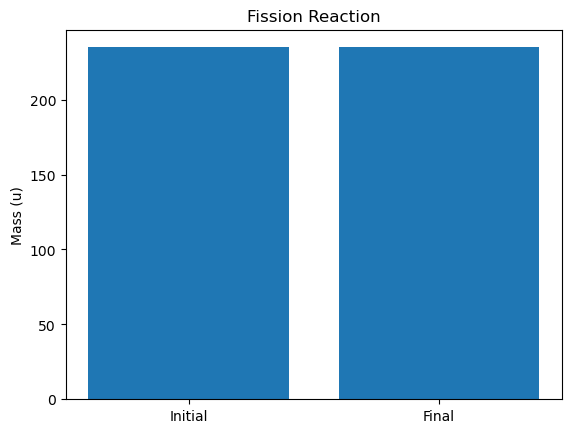

Energy Released: 316862.5211739849 MeV


In [4]:
# Simulate a fission reaction for Uranium-235
fragment_mass, energy_released = lib.fission_reaction(235)

# Plot the result
plt.bar(['Initial', 'Final'], [235, fragment_mass * 2])
plt.ylabel('Mass (u)')
plt.title('Fission Reaction')
plt.show()

print(f"Energy Released: {energy_released} MeV")


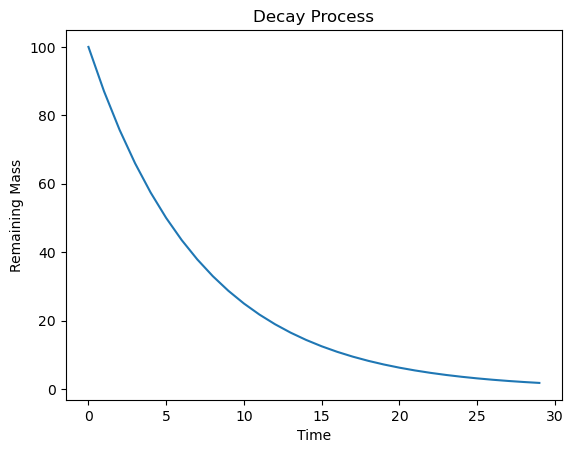

In [5]:
# Simulate the decay of a substance with a half-life of 5 units
time_elapsed = np.arange(0, 30, 1)
remaining_mass = [lib.decay_process(100, 5, t) for t in time_elapsed]

# Plot the result
plt.plot(time_elapsed, remaining_mass)
plt.xlabel('Time')
plt.ylabel('Remaining Mass')
plt.title('Decay Process')
plt.show()


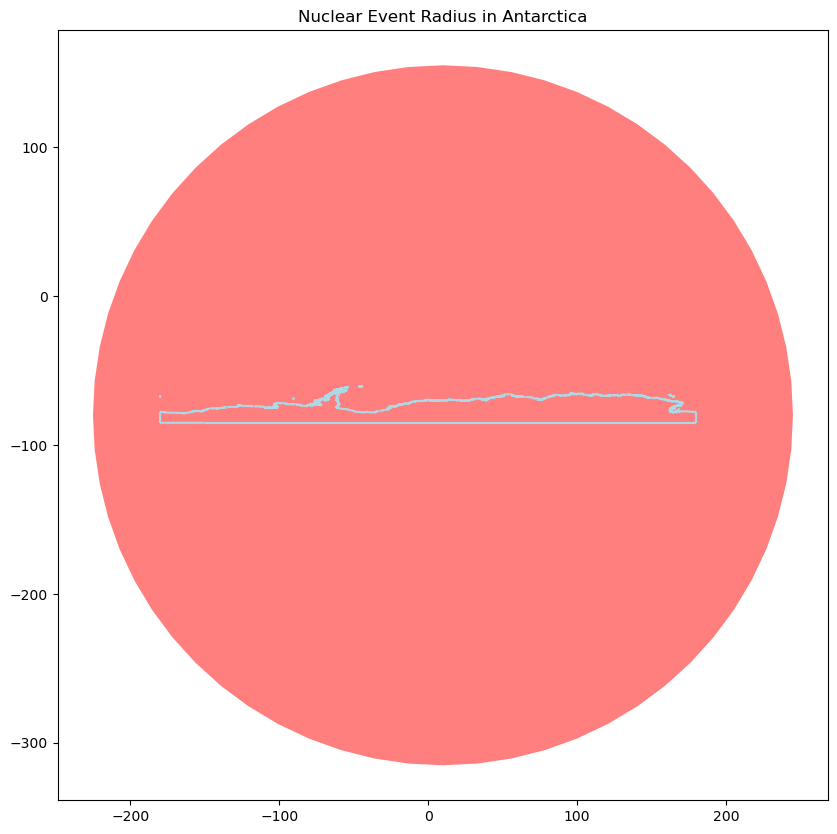

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Function to simulate a fission reaction
def fission_reaction(nucleus):
    # Placeholder for a fission reaction, replace with actual simulation if needed
    energy_released = nucleus * 1e5  # Just an example, please replace with actual calculation
    return _, energy_released

def energy_to_radius(energy):
    return energy * 1e-5

# Read the GeoJSON file
gdf = gpd.read_file('antarctica-latest-lines.geojson')

# Filter rows where 'other_tags' contains the string 'natural'=>'coastline'
coastline = gdf[gdf['other_tags'].str.contains('"natural"=>"coastline"', na=False)]

# Simulate a fission reaction and convert the energy to radius
_, energy_released = fission_reaction(235)
event_radius = energy_to_radius(energy_released)

# Create and plot the event radius circle
event_location = Point(10, -80)
event_radius_circle = event_location.buffer(event_radius)
event_gdf = gpd.GeoDataFrame(geometry=[event_radius_circle])

coastline.plot(figsize=(10, 10), color="lightblue")
event_gdf.plot(ax=plt.gca(), color="red", alpha=0.5)
plt.title("Nuclear Event Radius in Antarctica")
plt.show()
